In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-family: Inconsolata;
    font-size: 13px;
}

div.output_area pre {
    font-family: Inconsolata;
    font-size: 11px;
}

div.text_cell_render {
    font-family: Inconsolata;
    font-size: 13px;
}
</style>

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [4]:
path_dfs = r"../results/dfs"
list_csvgz4drugs = [f for f in os.listdir(path_dfs) if f[-3:]=="csv"  and f[:6]=="4DRUGS"]
list_csvgz4items = [f for f in os.listdir(path_dfs) if f[-3:]=="csv"  and f[:6]=="4ITEMS"]
list_csvgz4drugs, list_csvgz4items

(['4DRUGS_gnn_type=GATConv_batch_size_by_HADMID=128.csv',
  '4DRUGS_gnn_type=GENConv_batch_size_by_HADMID=128.csv',
  '4DRUGS_gnn_type=GINEConv_batch_size_by_HADMID=128.csv'],
 ['4ITEMS_gnn_type=GATConv_batch_size_by_HADMID=128.csv',
  '4ITEMS_gnn_type=GENConv_batch_size_by_HADMID=128.csv',
  '4ITEMS_gnn_type=GINEConv_batch_size_by_HADMID=128.csv'])

In [13]:
dfs4drugs = [pd.read_csv(os.path.join(path_dfs, f)) for f in list_csvgz4drugs]
dfs4items = [pd.read_csv(os.path.join(path_dfs, f)) for f in list_csvgz4items]

# Different `gnn_type`

In [32]:
total_df_diff_gnn4drugs = pd.concat(dfs4drugs[:3], keys=["GAT", "GEN", "GINE"])
total_df_diff_gnn4items = pd.concat(dfs4items[:3], keys=["GAT", "GEN", "GINE"])
total_df_diff_gnn4drugs.loc['GEN']

,Unnamed: 0,rocauc,prauc,accuracy,jaccard,precision,recall,f1,ddi_pred,ddi_true
0,0,0.974950,0.947303,0.920490,0.796318,0.844976,0.932562,0.886611,0.073470,0.075610
1,1,0.983105,0.961805,0.941619,0.843877,0.885989,0.946679,0.915329,0.079366,0.084416
2,2,0.985610,0.966620,0.947128,0.857732,0.892722,0.956300,0.923418,0.086659,0.090812
3,3,0.987545,0.970925,0.952064,0.869588,0.903241,0.958915,0.930246,0.073208,0.075077
4,4,0.989681,0.975269,0.956268,0.880230,0.909960,0.964212,0.936301,0.074141,0.079930
5,5,0.991633,0.979814,0.961854,0.894257,0.921684,0.967796,0.944177,0.079180,0.077430
6,6,0.992874,0.982560,0.964620,0.901438,0.926604,0.970752,0.948164,0.073852,0.078649
7,7,0.994340,0.986290,0.969625,0.914354,0.938301,0.972846,0.955261,0.071702,0.080773
8,8,0.995001,0.987718,0.970323,0.916410,0.937495,0.976045,0.956382,0.069794,0.080530
9,9,0.996031,0.990430,0.974671,0.927917,0.947529,0.978181,0.962611,0.067140,0.073441


## Visualization

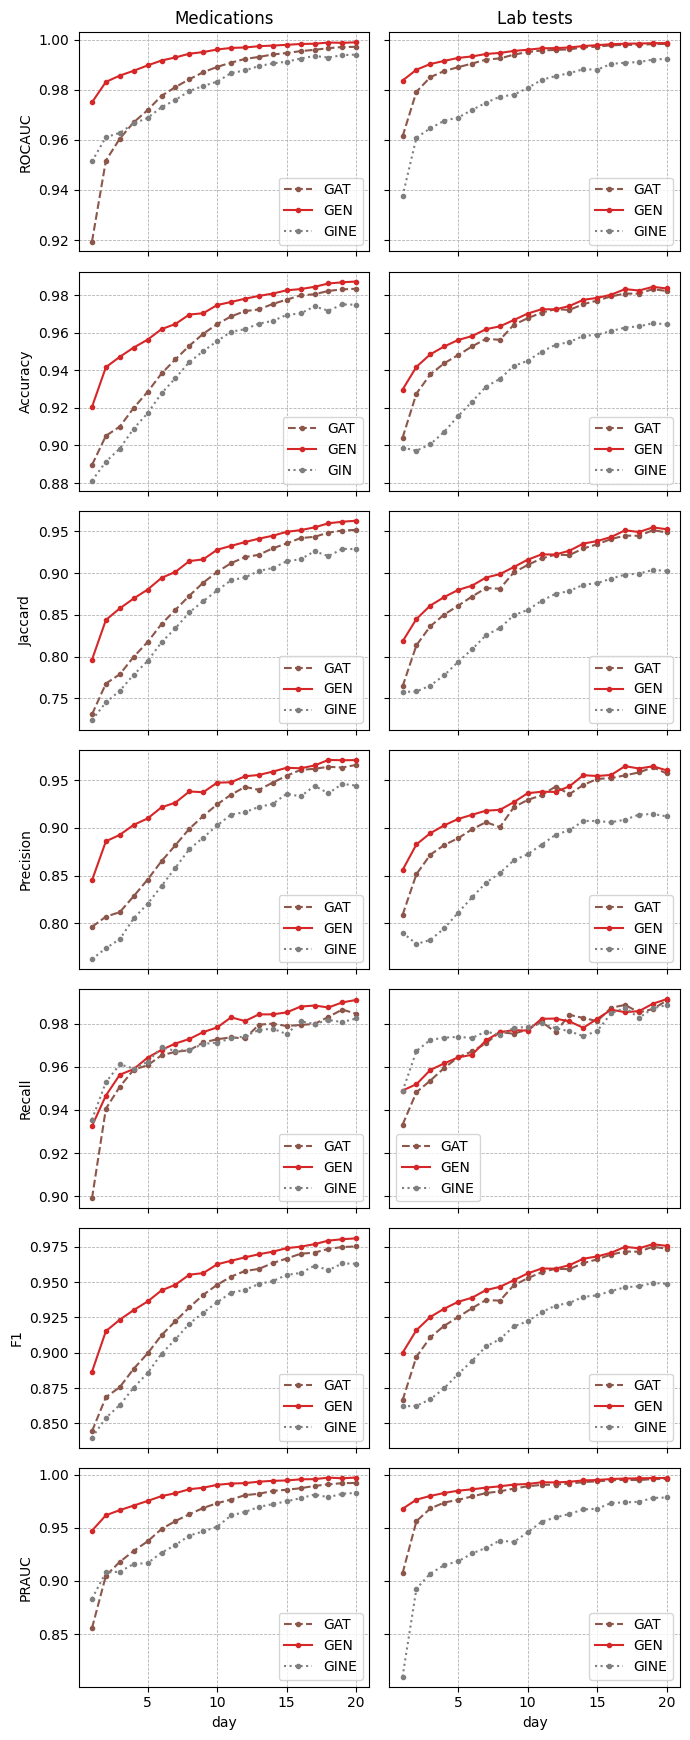

In [18]:
fmts = ('.C7:', '.C5--', '.C2:', '.C3-')
timesteps = range(1, 20+1)

fig, axs = plt.subplots(7, 2, sharex="all", sharey="row", figsize=(3.5*2, 2.5*7))

# AUC
axs[0, 0].set_title('Medications')
axs[0, 0].plot(timesteps, total_df_diff_gnn4drugs.loc['GAT'].rocauc, fmts[1],
               timesteps, total_df_diff_gnn4drugs.loc['GEN'].rocauc, fmts[3],
               timesteps, total_df_diff_gnn4drugs.loc['GINE'].rocauc, fmts[0])
axs[0, 0].set_ylabel('ROCAUC')
axs[0, 0].legend(["GAT", "GEN", "GINE"])
axs[0, 0].grid(True, linestyle='--', linewidth=.57)
axs[0, 1].set_title('Lab tests')
axs[0, 1].plot(timesteps, total_df_diff_gnn4items.loc['GAT'].rocauc, fmts[1],
               timesteps, total_df_diff_gnn4items.loc['GEN'].rocauc, fmts[3],
               timesteps, total_df_diff_gnn4items.loc['GINE'].rocauc, fmts[0])
axs[0, 1].legend(["GAT", "GEN", "GINE"])
axs[0, 1].grid(True, linestyle='--', linewidth=.57)

# ACC
axs[1, 0].plot(timesteps, total_df_diff_gnn4drugs.loc['GAT'].accuracy, fmts[1],
               timesteps, total_df_diff_gnn4drugs.loc['GEN'].accuracy, fmts[3],
               timesteps, total_df_diff_gnn4drugs.loc['GINE'].accuracy, fmts[0])
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend(["GAT", "GEN", "GIN"])
axs[1, 0].grid(True, linestyle='--', linewidth=.57)
axs[1, 1].plot(timesteps, total_df_diff_gnn4items.loc['GAT'].accuracy, fmts[1],
               timesteps, total_df_diff_gnn4items.loc['GEN'].accuracy, fmts[3],
               timesteps, total_df_diff_gnn4items.loc['GINE'].accuracy, fmts[0])
axs[1, 1].legend(["GAT", "GEN", "GINE"])
axs[1, 1].grid(True, linestyle='--', linewidth=.57)

# JACCARD
axs[2, 0].plot(timesteps, total_df_diff_gnn4drugs.loc['GAT'].jaccard, fmts[1],
               timesteps, total_df_diff_gnn4drugs.loc['GEN'].jaccard, fmts[3],
               timesteps, total_df_diff_gnn4drugs.loc['GINE'].jaccard, fmts[0])
axs[2, 0].set_ylabel('Jaccard')
axs[2, 0].legend(["GAT", "GEN", "GINE"])
axs[2, 0].grid(True, linestyle='--', linewidth=.57)
axs[2, 1].plot(timesteps, total_df_diff_gnn4items.loc['GAT'].jaccard, fmts[1],
               timesteps, total_df_diff_gnn4items.loc['GEN'].jaccard, fmts[3],
               timesteps, total_df_diff_gnn4items.loc['GINE'].jaccard, fmts[0])
axs[2, 1].legend(["GAT", "GEN", "GINE"])
axs[2, 1].grid(True, linestyle='--', linewidth=.57)

# precision
axs[3, 0].plot(timesteps, total_df_diff_gnn4drugs.loc['GAT'].precision, fmts[1],
               timesteps, total_df_diff_gnn4drugs.loc['GEN'].precision, fmts[3],
               timesteps, total_df_diff_gnn4drugs.loc['GINE'].precision, fmts[0])
axs[3, 0].set_ylabel('Precision')
axs[3, 0].legend(["GAT", "GEN", "GINE"])
axs[3, 0].grid(True, linestyle='--', linewidth=.57)
axs[3, 1].plot(timesteps, total_df_diff_gnn4items.loc['GAT'].precision, fmts[1],
               timesteps, total_df_diff_gnn4items.loc['GEN'].precision, fmts[3],
               timesteps, total_df_diff_gnn4items.loc['GINE'].precision, fmts[0])
axs[3, 1].legend(["GAT", "GEN", "GINE"])
axs[3, 1].grid(True, linestyle='--', linewidth=.57)

# recall
axs[4, 0].plot(timesteps, total_df_diff_gnn4drugs.loc['GAT'].recall, fmts[1],
               timesteps, total_df_diff_gnn4drugs.loc['GEN'].recall, fmts[3],
               timesteps, total_df_diff_gnn4drugs.loc['GINE'].recall, fmts[0])
axs[4, 0].set_ylabel('Recall')
axs[4, 0].legend(["GAT", "GEN", "GINE"])
axs[4, 0].grid(True, linestyle='--', linewidth=.57)
axs[4, 1].plot(timesteps, total_df_diff_gnn4items.loc['GAT'].recall, fmts[1],
               timesteps, total_df_diff_gnn4items.loc['GEN'].recall, fmts[3],
               timesteps, total_df_diff_gnn4items.loc['GINE'].recall, fmts[0])
axs[4, 1].legend(["GAT", "GEN", "GINE"])
axs[4, 1].grid(True, linestyle='--', linewidth=.57)

# F1
axs[5, 0].plot(timesteps, total_df_diff_gnn4drugs.loc['GAT'].f1, fmts[1],
               timesteps, total_df_diff_gnn4drugs.loc['GEN'].f1, fmts[3],
               timesteps, total_df_diff_gnn4drugs.loc['GINE'].f1, fmts[0])
axs[5, 0].set_ylabel('F1')
axs[5, 0].legend(["GAT", "GEN", "GINE"])
axs[5, 0].grid(True, linestyle='--', linewidth=.57)
axs[5, 1].plot(timesteps, total_df_diff_gnn4items.loc['GAT'].f1, fmts[1],
               timesteps, total_df_diff_gnn4items.loc['GEN'].f1, fmts[3],
               timesteps, total_df_diff_gnn4items.loc['GINE'].f1, fmts[0])
axs[5, 1].legend(["GAT", "GEN", "GINE"])
axs[5, 1].grid(True, linestyle='--', linewidth=.57)

# PRAUC
axs[6, 0].plot(timesteps, total_df_diff_gnn4drugs.loc['GAT'].prauc, fmts[1],
               timesteps, total_df_diff_gnn4drugs.loc['GEN'].prauc, fmts[3],
               timesteps, total_df_diff_gnn4drugs.loc['GINE'].prauc, fmts[0])
axs[6, 0].set_ylabel('PRAUC')
axs[6, 0].legend(["GAT", "GEN", "GINE"])
axs[6, 0].grid(True, linestyle='--', linewidth=.57)
axs[6, 0].set_xlabel('day')
axs[6, 1].plot(timesteps, total_df_diff_gnn4items.loc['GAT'].prauc, fmts[1],
               timesteps, total_df_diff_gnn4items.loc['GEN'].prauc, fmts[3],
               timesteps, total_df_diff_gnn4items.loc['GINE'].prauc, fmts[0])
axs[6, 1].legend(["GAT", "GEN", "GINE"])
axs[6, 1].grid(True, linestyle='--', linewidth=.57)
axs[6, 1].set_xlabel('day')

# fig.suptitle('Performance of different downstream recommendation tasks \n')
plt.tight_layout()

# Total performance

In [21]:
path_dir_total_dicts = r"../results/total_dicts"
list_pickle4drugs = [f for f in os.listdir(path_dir_total_dicts) if f[-6:]=="pickle"  and f[:6]=="4DRUGS"]
list_pickle4items = [f for f in os.listdir(path_dir_total_dicts) if f[-6:]=="pickle"  and f[:6]=="4ITEMS"]
list_pickle4drugs, list_pickle4items

(['4DRUGS_gnn_type=GATConv_batch_size_by_HADMID=128.pickle',
  '4DRUGS_gnn_type=GENConv_batch_size_by_HADMID=128.pickle',
  '4DRUGS_gnn_type=GINEConv_batch_size_by_HADMID=128.pickle'],
 ['4ITEMS_gnn_type=GATConv_batch_size_by_HADMID=128.pickle',
  '4ITEMS_gnn_type=GENConv_batch_size_by_HADMID=128.pickle',
  '4ITEMS_gnn_type=GINEConv_batch_size_by_HADMID=128.pickle'])

## Drugs

In [25]:
with open(os.path.join(path_dir_total_dicts, list_pickle4drugs[0]), 'rb') as f:
    dict4drugs_gat = pickle.load(f)
    
dict4drugs_gat

{'rocauc': 0.9775964447211891,
 'prauc': 0.9526362952125657,
 'accuracy': 0.9367963814177155,
 'jaccard': 0.834734388245267,
 'precision': 0.8666890196304426,
 'recall': 0.9576989429077563,
 'f1': 0.9099239580325343,
 'ddi_pred': 0.08433216593761166,
 'ddi_true': 0.0849683848656183}

In [26]:
with open(os.path.join(path_dir_total_dicts, list_pickle4drugs[1]), 'rb') as f:
    dict4drugs_gen = pickle.load(f)
    
dict4drugs_gen

{'rocauc': 0.9914640907469326,
 'prauc': 0.9808015068359175,
 'accuracy': 0.9588962174785792,
 'jaccard': 0.8866958243446911,
 'precision': 0.9161505001670175,
 'recall': 0.9650099508439886,
 'f1': 0.9399457113365568,
 'ddi_pred': 0.07432355415882395,
 'ddi_true': 0.07837104654968845}

In [27]:
with open(os.path.join(path_dir_total_dicts, list_pickle4drugs[2]), 'rb') as f:
    dict4drugs_gine = pickle.load(f)
    
dict4drugs_gine

{'rocauc': 0.9760475554269916,
 'prauc': 0.9395370066110337,
 'accuracy': 0.9267571998355034,
 'jaccard': 0.8143789365120853,
 'precision': 0.8399088751460604,
 'recall': 0.9640187258545697,
 'f1': 0.8976944343033723,
 'ddi_pred': 0.08043522835645561,
 'ddi_true': 0.08618020996815648}

## Items

In [28]:
with open(os.path.join(path_dir_total_dicts, list_pickle4items[0]), 'rb') as f:
    dict4items_gat = pickle.load(f)

dict4items_gat

{'rocauc': 0.9879991066946481,
 'prauc': 0.9751727609665048,
 'accuracy': 0.9458027816278058,
 'jaccard': 0.8555802597259784,
 'precision': 0.8844629368952517,
 'recall': 0.963235429242395,
 'f1': 0.922170038446438}

In [29]:
with open(os.path.join(path_dir_total_dicts, list_pickle4items[1]), 'rb') as f:
    dict4items_gen = pickle.load(f)

dict4items_gen

{'rocauc': 0.9926901152568133,
 'prauc': 0.9852611959126863,
 'accuracy': 0.9559604076333402,
 'jaccard': 0.8796115786096784,
 'precision': 0.9083161704679797,
 'recall': 0.9653187968310374,
 'f1': 0.9359503725342174}

In [30]:
with open(os.path.join(path_dir_total_dicts, list_pickle4items[2]), 'rb') as f:
    dict4items_gine = pickle.load(f)

dict4items_gine

{'rocauc': 0.9684099796765053,
 'prauc': 0.9211048262538148,
 'accuracy': 0.9221192252400209,
 'jaccard': 0.8058355397156861,
 'precision': 0.8266653308810948,
 'recall': 0.9696794573572183,
 'f1': 0.8924794334732811}